<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/1_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Simulation: Poisson Distribution

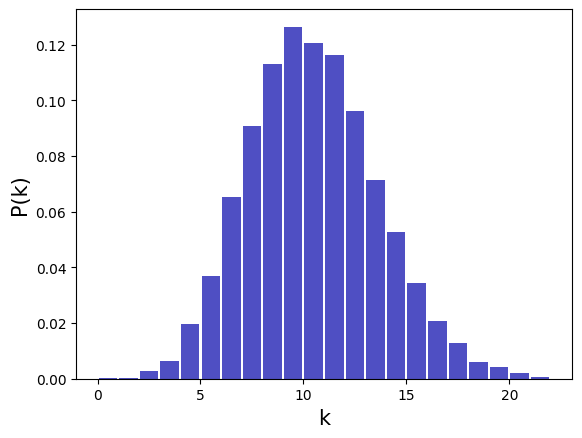

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lbd = 10 # lambda
n = 10000 # numero de puntos extraídos de una distribución de Poisson
P = np.random.poisson(lbd, n)
k = np.arange(0, np.max(P))
count, bins, ignored = plt.hist(P, bins=k, density=True, color='#0504aa',alpha=0.7,
                                rwidth=0.9)
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.show(True)

## Lei de los eventos raros

$$
\lim_{n\rightarrow \infty, p\rightarrow 0} \frac{n!}{(n-k)!k!}p^k(1-p)^{n-k} = \frac{e^{-\lambda}\lambda^k}{k!}
$$

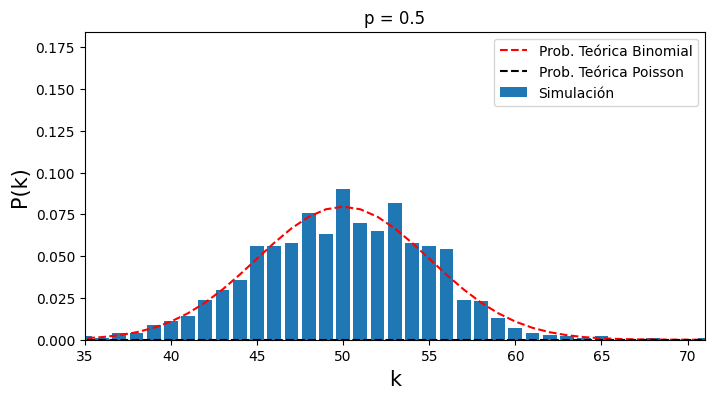

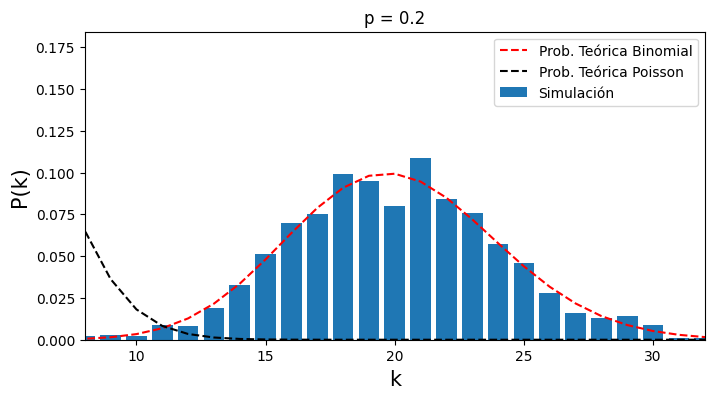

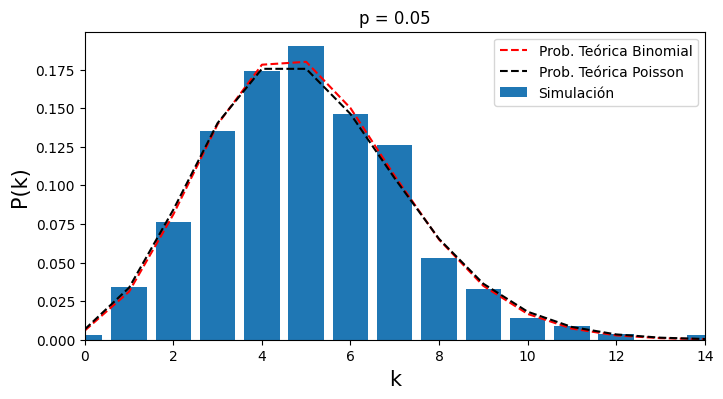

In [ ]:
from random import seed
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.special import factorial

seed(100) # semilla del generador de números aleatórios

vp = [0.5, 0.2, 0.05] # probabilidades de éxito
n = 100 # número de experimentos
for p in vp:
    Pk = np.zeros(n)
    vk = np.arange(0,n)
    ns = 1000 # número de simulaciones

    for j in range(0,ns):
        S = 0 # numero de éxitos
        for i in range(0,n):
            r = np.random.uniform()
            if(r <= p): # si es éxito
                S = S + 1
        Pk[S] = Pk[S] + 1
    Pk=Pk/sum(Pk) # Normaliza la distribución
    plt.figure(figsize=(8,4))
    plt.xlim(np.min(vk[Pk>0]),np.max(vk[Pk>0]))
    plt.bar(vk, Pk, label='Simulación')

    # curva teórica
    Pkt = np.zeros(n+1) # valores teóricos
    vkt = np.arange(0,n+1) # variación en k
    for k in range(0,n+1): # varia de 0 hasta n
        Pkt[k] = (factorial(n)/(factorial(n-k)*factorial(k)))*(p**k)*(1-p)**(n-k)
    plt.plot(vkt, Pkt, 'r--', label='Prob. Teórica Binomial')

    # curva teórica
    Po = np.zeros(n+1) # valores teóricos
    vo = np.arange(0,n+1) # variación en k     lbd = n*p
    for k in range(0,n+1): # varia de 0 hasta n
        Po[k] = (np.exp(-lbd)*lbd**k)/factorial(k)
    plt.plot(vo, Po, 'k--', label='Prob. Teórica Poisson')
    plt.title('p = '+ str(p))
    plt.xlabel('k', fontsize = 15)
    plt.ylabel('P(k)',fontsize = 15)
    plt.legend()
    plt.show(True)